In [30]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from gambler_env import GamblerEnv
from mdp import MDP
from utils import *

In [61]:
gambler_obj = GamblerEnv(goal=100, p_h=0.50)
mdp_obj = MDP(gambler_obj)

# Convergence Analysis

## $\Delta$ vs. Iteration

In [17]:
theta=1e-5
gamma = 1
max_iter=1000

In [18]:
%time iteration, vi_optimal_pi, vi_deltas, vi_optimal_v = mdp_obj.value_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
                                                                            
print(f"Converged in {iteration} iterations")

CPU times: user 8.63 s, sys: 395 ms, total: 9.02 s
Wall time: 8.66 s
Converged in 1000 iterations


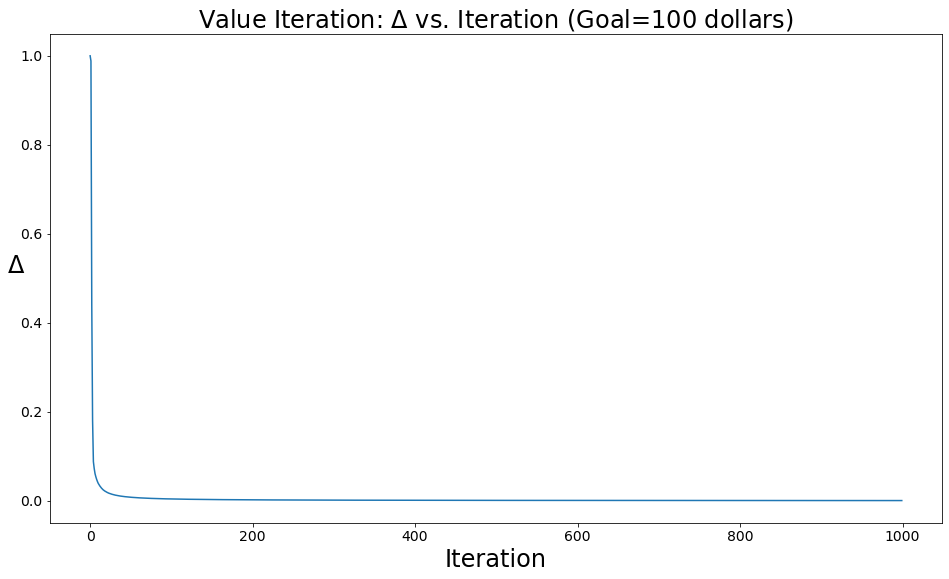

In [42]:
plt.figure(figsize=(16, 9))
plt.plot(vi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Value Iteration: $\Delta$ vs. Iteration (Goal=100 dollars)", fontsize=24);

In [20]:
%time iteration, pi_optimal_pi, pi_deltas, pi_optimal_v = mdp_obj.policy_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

CPU times: user 658 ms, sys: 6.6 ms, total: 665 ms
Wall time: 662 ms
Converged in 72 iterations


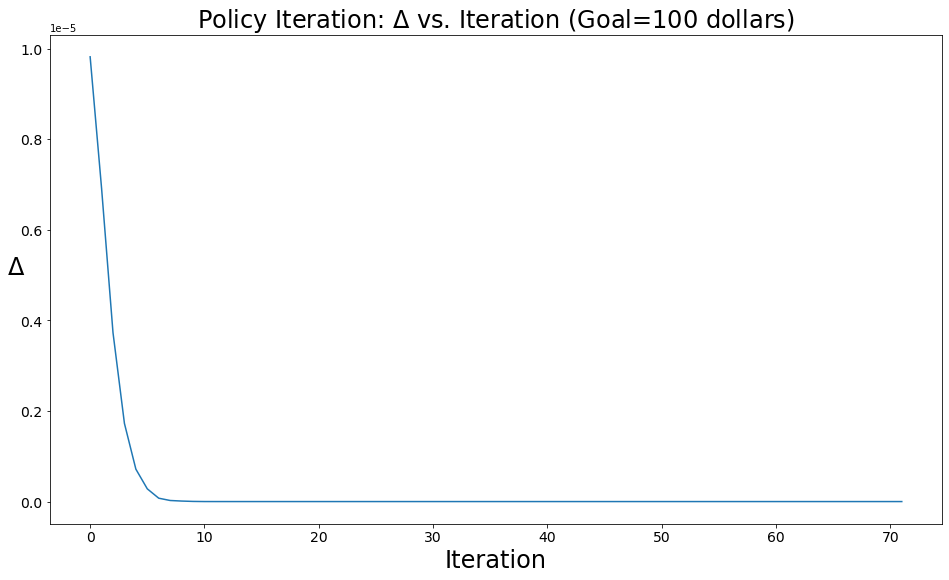

In [43]:
plt.figure(figsize=(16, 9))
plt.plot(pi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Policy Iteration: $\Delta$ vs. Iteration (Goal=100 dollars)", fontsize=24);

In [25]:
gambler2_obj = GamblerEnv(goal=1000, p_h=0.50)
mdp_obj2 = MDP(gambler2_obj)

In [ ]:
%time iteration, vi_optimal_pi, vi_deltas, vi_optimal_v = mdp_obj2.value_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
                                                                            
print(f"Converged in {iteration} iterations")

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(vi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Value Iteration: $\Delta$ vs. Iteration, Goal=$1000", fontsize=24);

In [ ]:
%time iteration, pi_optimal_pi, pi_deltas, pi_optimal_v = mdp_obj2.policy_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(pi_deltas)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("$\Delta$", fontsize=24, rotation=0);
plt.title("Policy Iteration: $\Delta$ vs. Iteration, Goal=$1000", fontsize=24);

## Q-learning Score vs Iteration

In [55]:
q_optimal_pi, scores, q_optimal_v = mdp_obj.q_learning(gamma=1, num_episodes=10000)

In [33]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

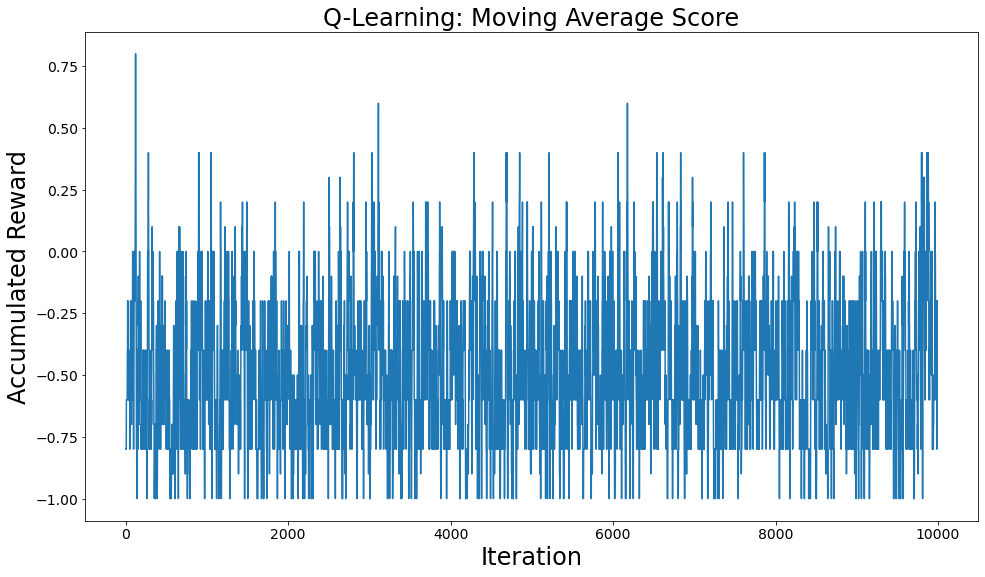

In [34]:
plt.figure(figsize=(16, 9))
plt.plot(moving_average(scores, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Iteration", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.title("Q-Learning: Moving Average Score", fontsize=24);

## Q-Learning Cumulative Rewards vs. Learning Rates ($\alpha$)

In [28]:
# for alpha = 0.05
q_optimal_pi, scores_0_05, q_optimal_v = mdp_obj.q_learning(learning_rate=0.05, num_episodes=10000)
# for alpha = 0.25
q_optimal_pi, scores_0_25, q_optimal_v = mdp_obj.q_learning(learning_rate=0.25, num_episodes=10000)
# for alpha = 0.5
q_optimal_pi, scores_0_50, q_optimal_v = mdp_obj.q_learning(learning_rate=0.5, num_episodes=10000)
# for alpha = 0.75
q_optimal_pi, scores_0_75, q_optimal_v = mdp_obj.q_learning(learning_rate=0.75, num_episodes=10000)
# for alpha = 1.0
q_optimal_pi, scores_0_1, q_optimal_v = mdp_obj.q_learning(learning_rate=1.0, num_episodes=10000)

In [51]:
alpha_05 = pd.Series(moving_average(scores_0_05,100))
alpha_25 = pd.Series(moving_average(scores_0_25,100))
alpha_50 = pd.Series(moving_average(scores_0_50,100))
alpha_75 = pd.Series(moving_average(scores_0_75,100))
alpha_1 = pd.Series(moving_average(scores_0_1,100))

tmp=pd.concat([alpha_05,alpha_25,alpha_50,alpha_75,alpha_1], axis=1)

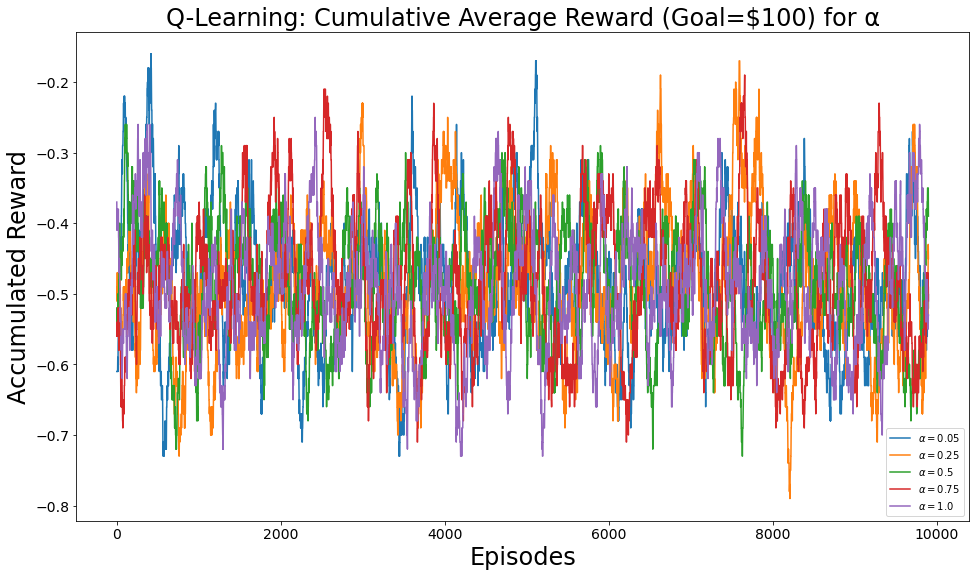

In [52]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\u03B1 = 0.05$',
               '$\u03B1 = 0.25$',
               '$\u03B1 = 0.5$',
               '$\u03B1 = 0.75$',
               '$\u03B1 = 1.0$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (Goal=$100) for \u03B1", fontsize=24);

## Q-Learning Cumulative Rewards vs. Epsilon

In [44]:
# for eps = 0.05
_, scores_0_05, _ = mdp_obj.q_learning(epsilon=0.05, num_episodes=10000)
# for eps = 0.25
_, scores_0_25, _ = mdp_obj.q_learning(epsilon=0.25, num_episodes=10000)
# for eps = 0.5
_, scores_0_50, _ = mdp_obj.q_learning(epsilon=0.5, num_episodes=10000)
# for eps = 0.75
_, scores_0_75, _ = mdp_obj.q_learning(epsilon=0.75, num_episodes=10000)
# for eps = 1.0
_, scores_0_1, _ = mdp_obj.q_learning(epsilon=1.0, num_episodes=10000)

In [53]:
eps_05 = pd.Series(moving_average(scores_0_05,100))
eps_25 = pd.Series(moving_average(scores_0_25,100))
eps_50 = pd.Series(moving_average(scores_0_50,100))
eps_75 = pd.Series(moving_average(scores_0_75,100))
eps_1 = pd.Series(moving_average(scores_0_1,100))

tmp=pd.concat([eps_05,eps_25,eps_50,eps_75,eps_1], axis=1)

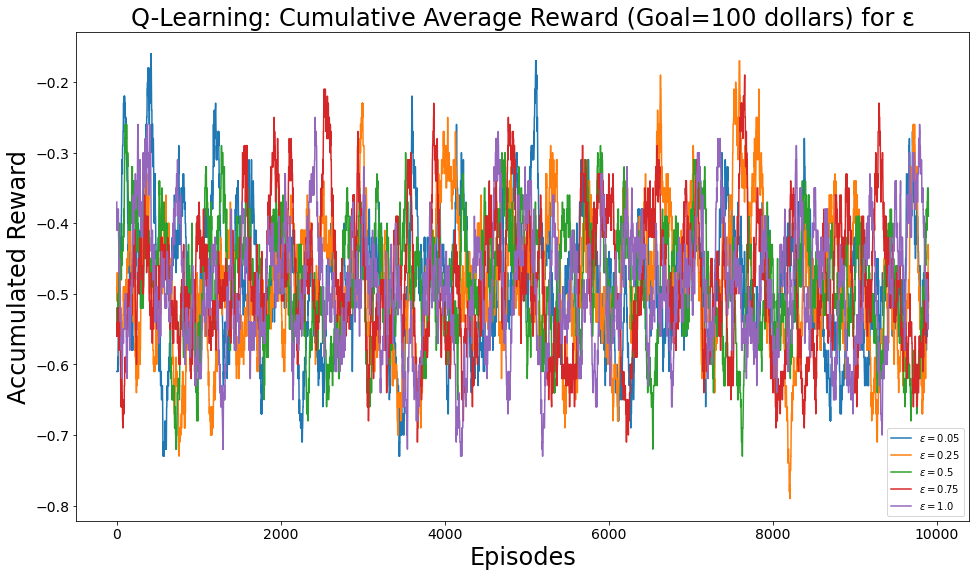

In [54]:
tmp = pd.DataFrame(tmp)
plt.figure(figsize=(16, 9))
plt.plot(tmp)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Episodes", fontsize=24)
plt.ylabel("Accumulated Reward", fontsize=24);
plt.legend(['$\u03B5 = 0.05$',
               '$\u03B5 = 0.25$',
               '$\u03B5 = 0.5$',
               '$\u03B5 = 0.75$',
               '$\u03B5 = 1.0$'], loc='best')
plt.title("Q-Learning: Cumulative Average Reward (Goal=100 dollars) for \u03B5", fontsize=24);

# Optimal $V$

## Value Iteration

In [80]:
def plot_v_values(v_values, title):
    plt.figure(figsize=(16, 9))
    plt.xlabel("Capital")
    plt.ylabel("Value estimates, V(S)")
    plt.title(title)
    plt.bar(v_values.keys(), v_values.values())

In [135]:
gambler_obj = GamblerEnv(goal=100, p_h=0.43)
mdp_obj = MDP(gambler_obj)

In [136]:
theta=1e-5
gamma = 1
max_iter=1000

In [137]:
%time iteration, vi_optimal_pi, vi_deltas, vi_optimal_v = mdp_obj.value_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
                                                                            
print(f"Converged in {iteration} iterations")

CPU times: user 1.03 s, sys: 58.1 ms, total: 1.09 s
Wall time: 1.03 s
Converged in 117 iterations


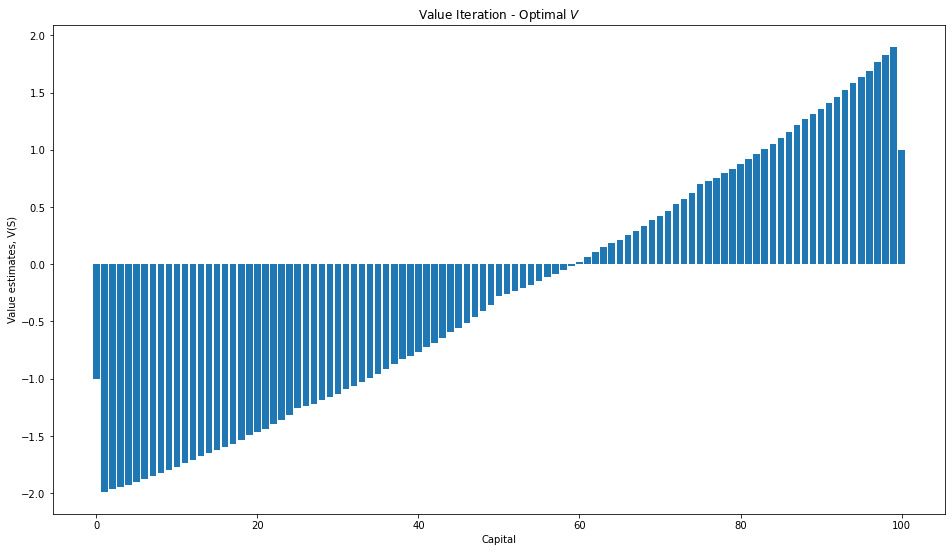

In [138]:
plot_v_values(vi_optimal_v, "Value Iteration - Optimal $V$")

## Policy Iteration

In [139]:
iteration, pi_optimal_pi, pi_deltas, pi_optimal_v = mdp_obj.policy_iteration(theta=theta, gamma=gamma, max_iter=max_iter)
print(f"Converged in {iteration} iterations")

Converged in 24 iterations


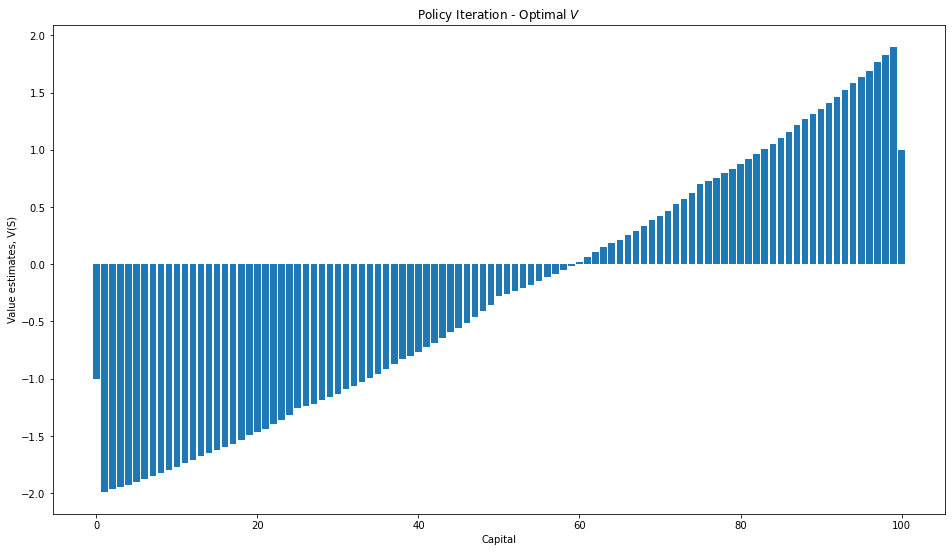

In [140]:
plot_v_values(pi_optimal_v, "Policy Iteration - Optimal $V$")

## Q-Learning

In [141]:
q_optimal_pi, scores, q_optimal_v = mdp_obj.q_learning(gamma=1, num_episodes=10000)

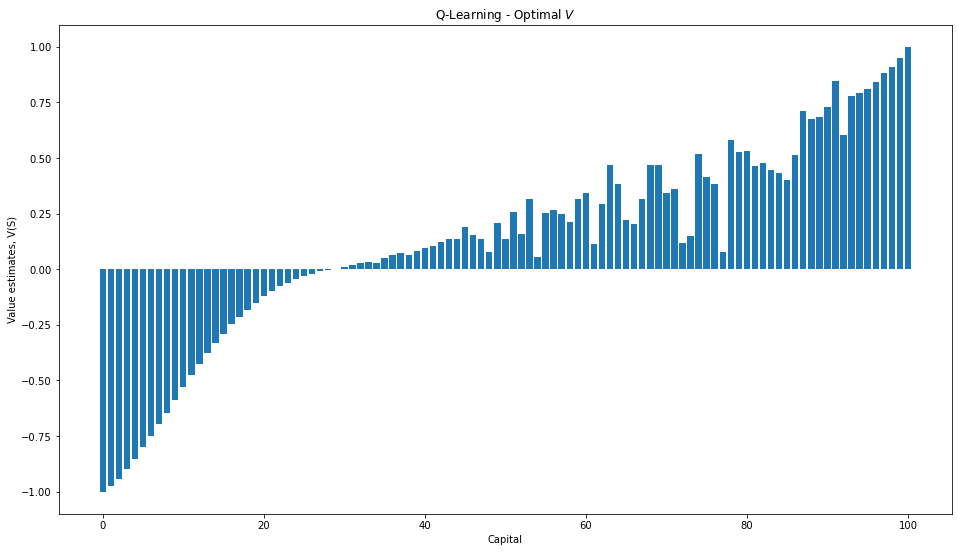

In [142]:
plot_v_values(q_optimal_v, "Q-Learning - Optimal $V$")

# Optimal $\pi$

## Value Iteration

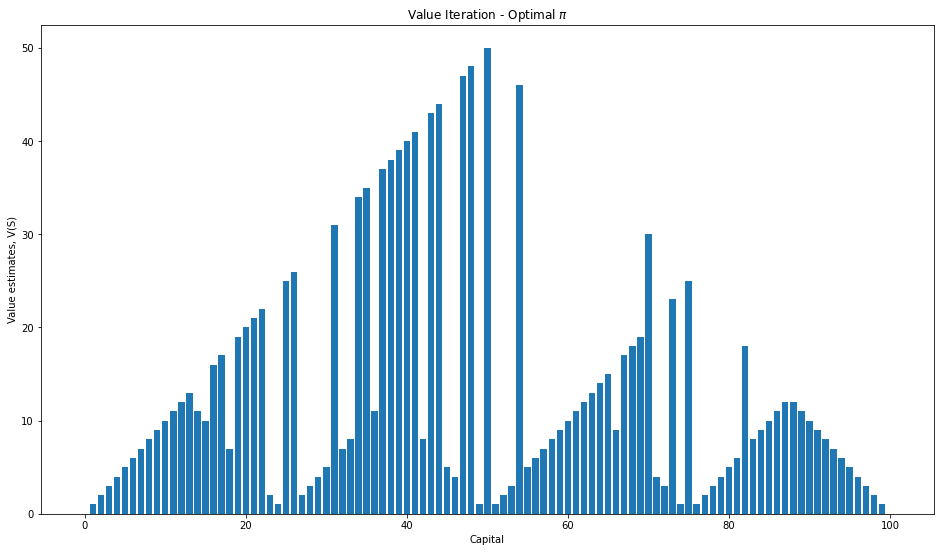

In [143]:
plot_v_values(vi_optimal_pi, "Value Iteration - Optimal $\pi$")

## Policy Iteration

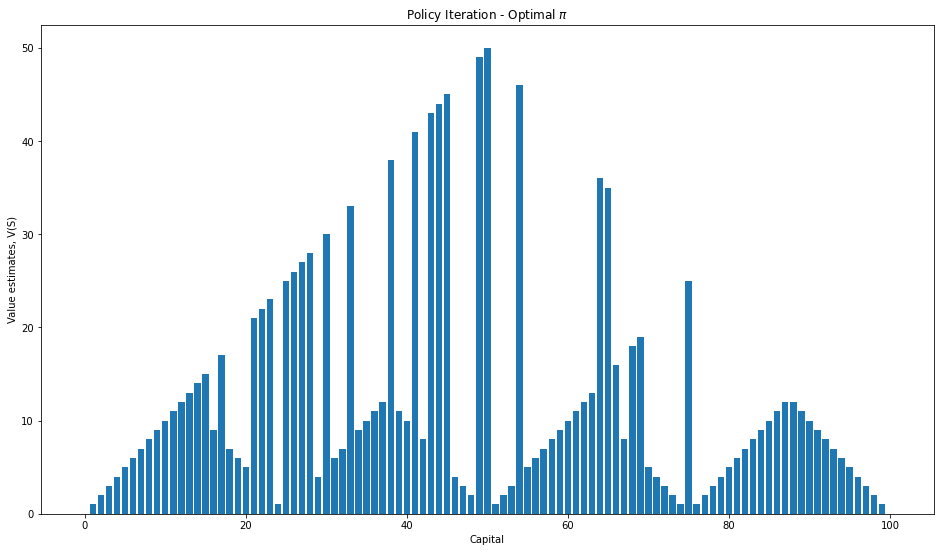

In [144]:
plot_v_values(pi_optimal_pi, "Policy Iteration - Optimal $\pi$")

## Q-Learning

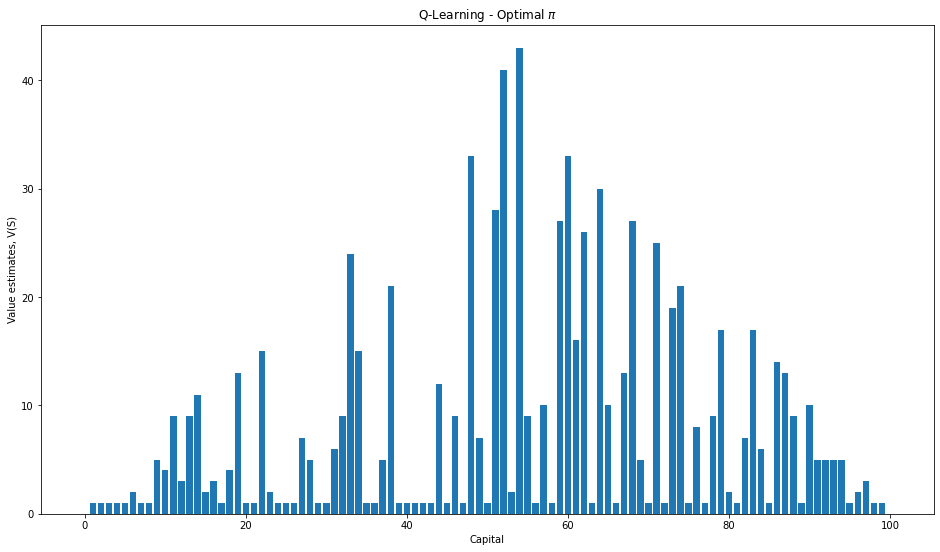

In [145]:
plot_v_values(q_optimal_pi, "Q-Learning - Optimal $\pi$")